In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate synthetic dataset
np.random.seed(42)
n_samples = 500

# Generate synthetic customer data
income = np.random.normal(300000, 50000, n_samples)  # Annual income
spending_score = np.random.uniform(1, 100, n_samples)  # Spending Score
age = np.random.normal(30, 10, n_samples)  # Age
purchases = np.random.randint(1, 15, n_samples)  # Purchases per month

# Create DataFrame
df = pd.DataFrame({
    'Annual_Income': income,
    'Spending_Score': spending_score,
    'Age': age,
    'Purchases_Per_Month': purchases
})

In [171]:
df.head()

,Annual_Income,Spending_Score,Age,Purchases_Per_Month
0,324835.707651,64.945807,28.328819,8
1,293086.784941,57.507052,31.467137,3
2,332384.426905,36.253576,42.065090,8
3,376151.492820,98.665010,21.830643,1
4,288292.331264,60.971707,33.686733,5


from matplotlib import pyplot as plt
_df_43['Annual_Income'].plot(kind='hist', bins=20, title='Annual_Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Spending_Score'].plot(kind='hist', bins=20, title='Spending_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Purchases_Per_Month'].plot(kind='hist', bins=20, title='Purchases_Per_Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47.plot(kind='scatter', x='Annual_Income', y='Spending_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48.plot(kind='scatter', x='Spending_Score', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49.plot(kind='scatter', x='Age', y='Purchases_Per_Month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Annual_Income'].plot(kind='line', figsize=(8, 4), title='Annual_Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_51['Spending_Score'].plot(kind='line', figsize=(8, 4), title='Spending_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_53['Purchases_Per_Month'].plot(kind='line', figsize=(8, 4), title='Purchases_Per_Month')
plt.gca().spines[['top', 'right']].set_visible(False)

In [172]:
# EDA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

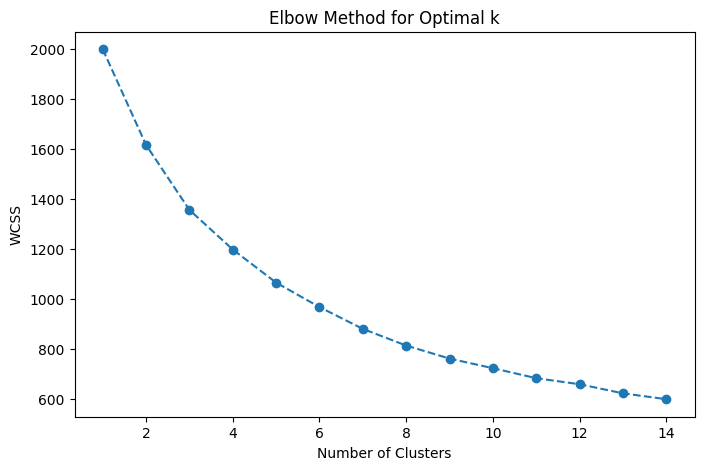

In [173]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [174]:
# Apply K-Means
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)  # กำหนดค่า Hyperparameter ให้โมเดล
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [175]:
df.shape

(500, 5)

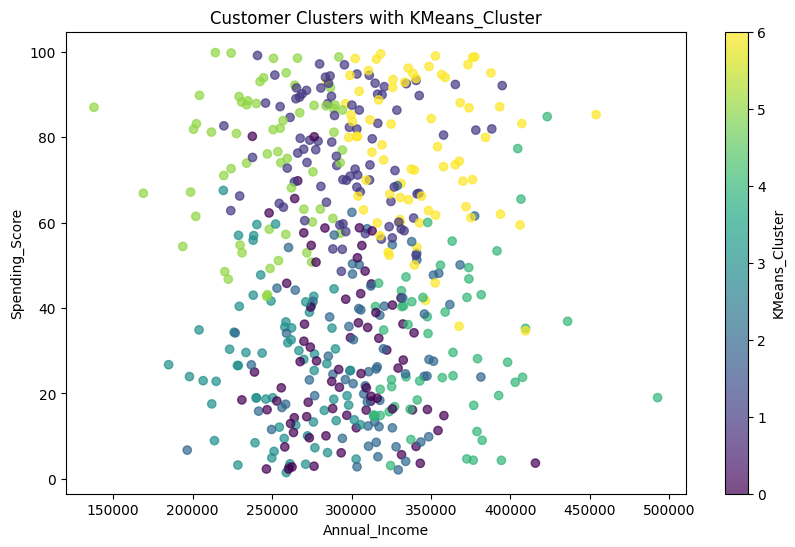

In [176]:
# Visualize the K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Annual_Income')  # ตั้งค่าชื่อของ Feature
plt.ylabel('Spending_Score')  # ตั้งค่าชื่อของ Feature
plt.title('Customer Clusters with KMeans_Cluster')
plt.colorbar(label='KMeans_Cluster')
plt.show()

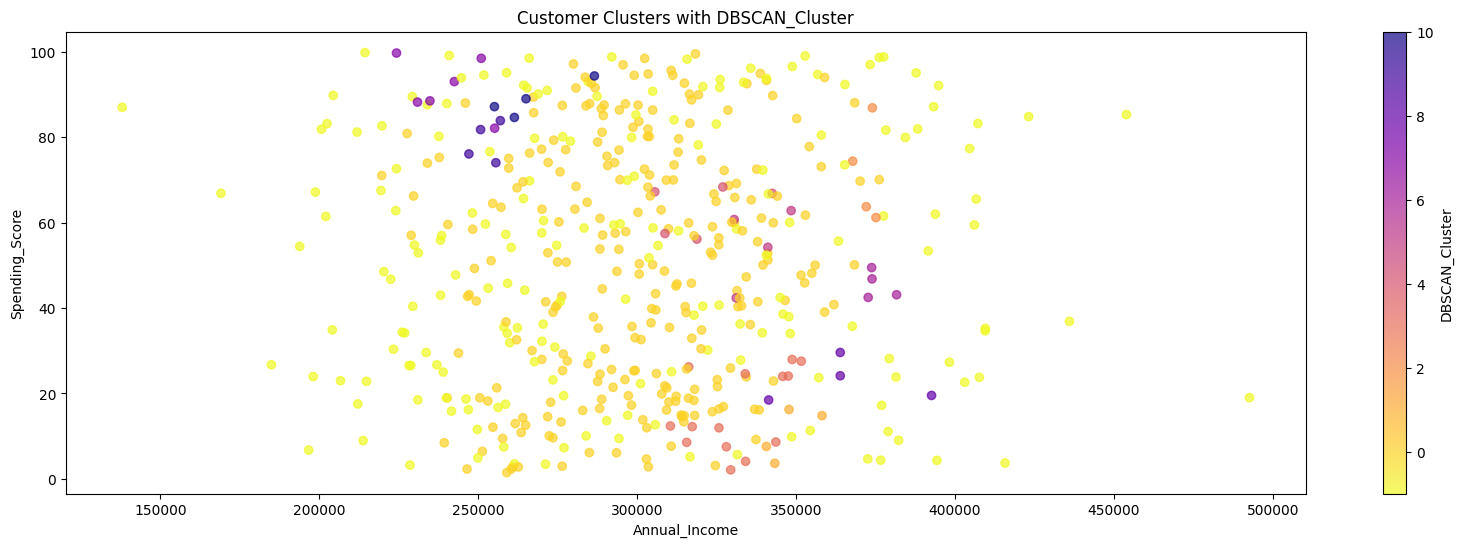

In [246]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.65, min_samples=4)  # กำหนดค่า Hyperparameter ให้โมเดล
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize the DBSCAN clusters
plt.figure(figsize=(20, 6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], c=df['DBSCAN_Cluster'], cmap='plasma_r', alpha=0.7)
plt.xlabel('Annual_Income')  # ตั้งค่าชื่อของ Feature
plt.ylabel('Spending_Score')  # ตั้งค่าชื่อของ Feature
plt.title('Customer Clusters with DBSCAN_Cluster')
plt.colorbar(label='DBSCAN_Cluster')
plt.show()

Kmean เหมาะกับการจำแนกข้อมูลมากกว่า และใช้งานง่ายกว่า

DBScan เหมาะกับการจำแนกกลุ่มไม่เท่าแต่สามารถแยก outliner ได้ดีกว่ามีประสิทธิภาพกว่า